<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

Чтобы при перезапуске кода сохранить состояние рандомайзера, и он вернул тот же результат

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [76]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [77]:
df_test.iloc[0]

name              Mahindra Xylo E4 BS IV
year                                2010
selling_price                     229999
km_driven                         168000
fuel                              Diesel
seller_type                   Individual
transmission                      Manual
owner                        First Owner
mileage                        14.0 kmpl
engine                           2498 CC
max_power                        112 bhp
torque           260 Nm at 1800-2200 rpm
seats                                7.0
Name: 0, dtype: object

### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [4]:
missing = df_train.isna().sum()
missing[missing > 0].index.tolist()

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [5]:
df_train.duplicated().sum()

np.int64(985)

In [6]:
from ydata_profiling import ProfileReport

ProfileReport(df_train, title='Pandas Profiling Report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Выводы:
В датасете есть пропуски в следующих признаках: 'mileage', 'engine', 'max_power', 'torque', 'seats', всего пропущено 1005. \
Всего дубликатов 985 (7%). \
Года варьируются от 1983 по 2020. \
Больше всего топлива типа дизель. \
Больше всего типов продавца индивидуальный. \
Наибольшую положительную корреляцию имеют признаки: selling_price и year. Отрицательную - km_driven и year. 


### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [7]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [8]:
df_train.describe(exclude='object')

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [9]:
train_mean = df_train.mean(numeric_only=True)
train_median = df_train.median(numeric_only=True)
test_mean = df_test.mean(numeric_only=True)
test_median = df_test.median(numeric_only=True)

In [10]:
train_mean - test_mean

year                 0.137403
selling_price    21614.155171
km_driven        -1808.725483
seats                0.008203
dtype: float64

In [11]:
train_median - test_median

year                 1.0
selling_price    15001.0
km_driven        -1500.0
seats                0.0
dtype: float64

### Выводы: 
В целом, по всем числовым признакам распределение схожее. Кроме пробега, на тесте пробег выше.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [12]:
data_without_target = [col for col in df_train.columns if col != 'selling_price']
duplicates = df_train[df_train.duplicated(subset=data_without_target, keep=False)]
len(duplicates)

1799

In [13]:
duplicates

name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
...                                        ...   ...            ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
22        45000  Petrol  Individual       Manual   First Owner   21.4 kmpl   
26        25000  Petrol  Individual       Manual   First Owner   16.8 kmpl   
27        70000  Diesel  Individual       Manual   First Owner   24.3 kmpl   
28        50000  Petrol  Individual       Manual  Second Owner         NaN   
29        35000  Petrol  Individual       Manual  Second Owner   14.0 kmpl   
...         ...     ...         ...          ...           ...         ...   
6981      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine  max_power               torque  seats  
22    1197 CC   83.1 bhp       115Nm@ 4000rpm    5.0  
26     796 CC   34.2 bhp        59Nm@ 2500rpm    8.0  
27    1248 CC   88.5 bhp       200Nm@ 1750rpm    5.0  
28        NaN        NaN                  NaN    NaN  
29     796 CC     35 bhp      6.1kgm@ 3000rpm    5.0  
...       ...        ...                  ...    ...  
6981  1498 CC  98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6984  1498 CC  98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC     74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC     70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC     70 bhp  140Nm@ 1800-3000rpm    5.0  

[1799 rows x 13 columns]

In [14]:
df_train.drop_duplicates(subset=data_without_target, keep='first', inplace=True)

In [15]:
df_train.reset_index(drop=True, inplace=True)

In [16]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [17]:
import re


def extract_numeric(value):
    if isinstance(value, str):
        match = re.search(r'([\d.]+)', value)
        return float(match.group(1)) if match else None
    return None

for col in ["mileage", "engine", "max_power"]:
    df_train[col] = df_train[col].apply(extract_numeric)
    df_test[col] = df_test[col].apply(extract_numeric)

In [18]:
df_train[["mileage", "engine", "max_power"]]

mileage  engine  max_power
0       23.40  1248.0      74.00
1       21.14  1498.0     103.52
2       23.00  1396.0      90.00
3       16.10  1298.0      88.20
4       20.14  1197.0      81.86
...       ...     ...        ...
5835    17.92  1086.0      62.10
5836    18.90   998.0      67.10
5837    18.50  1197.0      82.85
5838    16.80  1493.0     110.00
5839    19.30  1248.0      73.90

[5840 rows x 3 columns]

In [19]:
df_train[['torque', 'torque_rpm']] = df_train['torque'].str.extract(r'([\d.]+)[^@]*@[\s]?([\d.]+)')
df_train['torque'] = df_train['torque'].astype(float)
df_train['torque_rpm'] = df_train['torque_rpm'].astype(float)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40  1248.0   
1     Diesel  Individual       Manual          Second Owner    21.14  1498.0   
2     Diesel  Individual       Manual           First Owner    23.00  1396.0   
3     Petrol  Individual       Manual           First Owner    16.10  1298.0   
4     Petrol  Individual       Manual           First Owner    20.14  1197.0   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92  1086.0   
5836  Petrol  Individual       Manual          Second Owner    18.90   998.0   
5837  Petrol  Individual       Manual           First Owner    18.50  1197.0   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
5839  Diesel  Individual       Manual           First Owner    19.30  1248.0   

      max_power  torque  seats  torque_rpm  
0         74.00  190.00    5.0      2000.0  
1        103.52  250.00    5.0      1500.0  
2         90.00     NaN    5.0         NaN  
3         88.20   11.50    5.0         4.0  
4         81.86  113.75    5.0      4000.0  
...         ...     ...    ...         ...  
5835      62.10   96.10    5.0      3000.0  
5836      67.10   90.00    5.0      3500.0  
5837      82.85  113.70    5.0      4000.0  
5838     110.00   24.00    5.0         1.0  
5839      73.90  190.00    5.0      2000.0  

[5840 rows x 14 columns]

In [20]:
df_test[['torque', 'torque_rpm']] = df_test['torque'].str.extract(r'([\d.]+)[^@]*@[\s]?([\d.]+)')
df_test['torque'] = df_test['torque'].astype(float)
df_test['torque_rpm'] = df_test['torque_rpm'].astype(float)
df_test

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner  mileage  engine  \
0    Diesel  Individual       Manual   First Owner    14.00  2498.0   
1    Diesel  Individual       Manual   First Owner    21.50  1497.0   
2    Petrol  Individual    Automatic   First Owner    12.90  1799.0   
3    Diesel  Individual       Manual   First Owner    25.10  1498.0   
4    Petrol  Individual       Manual  Second Owner    16.50  1172.0   
..      ...         ...          ...           ...      ...     ...   
995  Petrol  Individual       Manual  Second Owner    19.81  1086.0   
996  Petrol  Individual       Manual  Second Owner    18.60  1197.0   
997  Diesel  Individual       Manual   First Owner    23.00  1396.0   
998  Petrol  Individual       Manual   First Owner    20.36  1197.0   
999  Diesel  Individual       Manual   First Owner    26.00  1498.0   

     max_power  torque  seats  torque_rpm  
0       112.00     NaN    7.0         NaN  
1       108.50  260.00    5.0      1500.0  
2       130.00  172.00    5.0      4300.0  
3        98.60  200.00    5.0      1750.0  
4        65.00     NaN    5.0         NaN  
..         ...     ...    ...         ...  
995      68.05   99.04    5.0      4500.0  
996      81.83  114.70    5.0      4000.0  
997      90.00     NaN    5.0         NaN  
998      78.90  111.80    5.0      4000.0  
999      98.60  200.00    5.0      1750.0  

[1000 rows x 14 columns]

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [21]:
train_median_values = df_train.median(numeric_only=True)
test_median_values = df_test.median(numeric_only=True)
df_train.fillna(train_median_values, inplace=True)
df_test.fillna(test_median_values, inplace=True)

missing_train = df_train.isna().sum()
missing_test = df_test.isna().sum()

missing_train, missing_test

(name             0
 year             0
 selling_price    0
 km_driven        0
 fuel             0
 seller_type      0
 transmission     0
 owner            0
 mileage          0
 engine           0
 max_power        0
 torque           0
 seats            0
 torque_rpm       0
 dtype: int64,
 name             0
 year             0
 selling_price    0
 km_driven        0
 fuel             0
 seller_type      0
 transmission     0
 owner            0
 mileage          0
 engine           0
 max_power        0
 torque           0
 seats            0
 torque_rpm       0
 dtype: int64)

### Выводы:
Медиана устойчива к выбросам, на среднее выбросы могут сильно повлиять. \
Лучше считать медиану по трейну, чтобы модель избежать утечки данных из теста при обучении модели.  

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [22]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_train[['engine', 'seats']]

engine  seats
0       1248      5
1       1498      5
2       1396      5
3       1298      5
4       1197      5
...      ...    ...
5835    1086      5
5836     998      5
5837    1197      5
5838    1493      5
5839    1248      5

[5840 rows x 2 columns]

In [23]:
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)
df_test[['engine', 'seats']]

engine  seats
0      2498      7
1      1497      5
2      1799      5
3      1498      5
4      1172      5
..      ...    ...
995    1086      5
996    1197      5
997    1396      5
998    1197      5
999    1498      5

[1000 rows x 2 columns]

Почему seats можно рассмотреть как категориальную переменную? Потому что seats является ограниченным множеством, поэтому каждое значение можно записать в отдельную категорию

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [24]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats   torque_rpm  
count  5840.000000  5840.000000  5840.000000  5840.000000  
mean     87.906371   161.880752     5.426712  2522.039555  
std      31.640418    89.450493     0.982344  1188.063981  
min       0.000000     4.800000     2.000000     1.000000  
25%      68.000000   101.000000     5.000000  1750.000000  
50%      81.860000   150.000000     5.000000  2000.000000  
75%      99.000000   200.000000     5.000000  3500.000000  
max     400.000000   789.000000    14.000000  5000.000000

Мы заполнили пропуски медианой и кол-во пропусков было относительно мало, поэтому распределение вряд ли сильно сдвинулось. Но если бы пропусков было много, тогда распределение сдвинулось бы в сторону медианы

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

<Figure size 1200x1200 with 0 Axes>

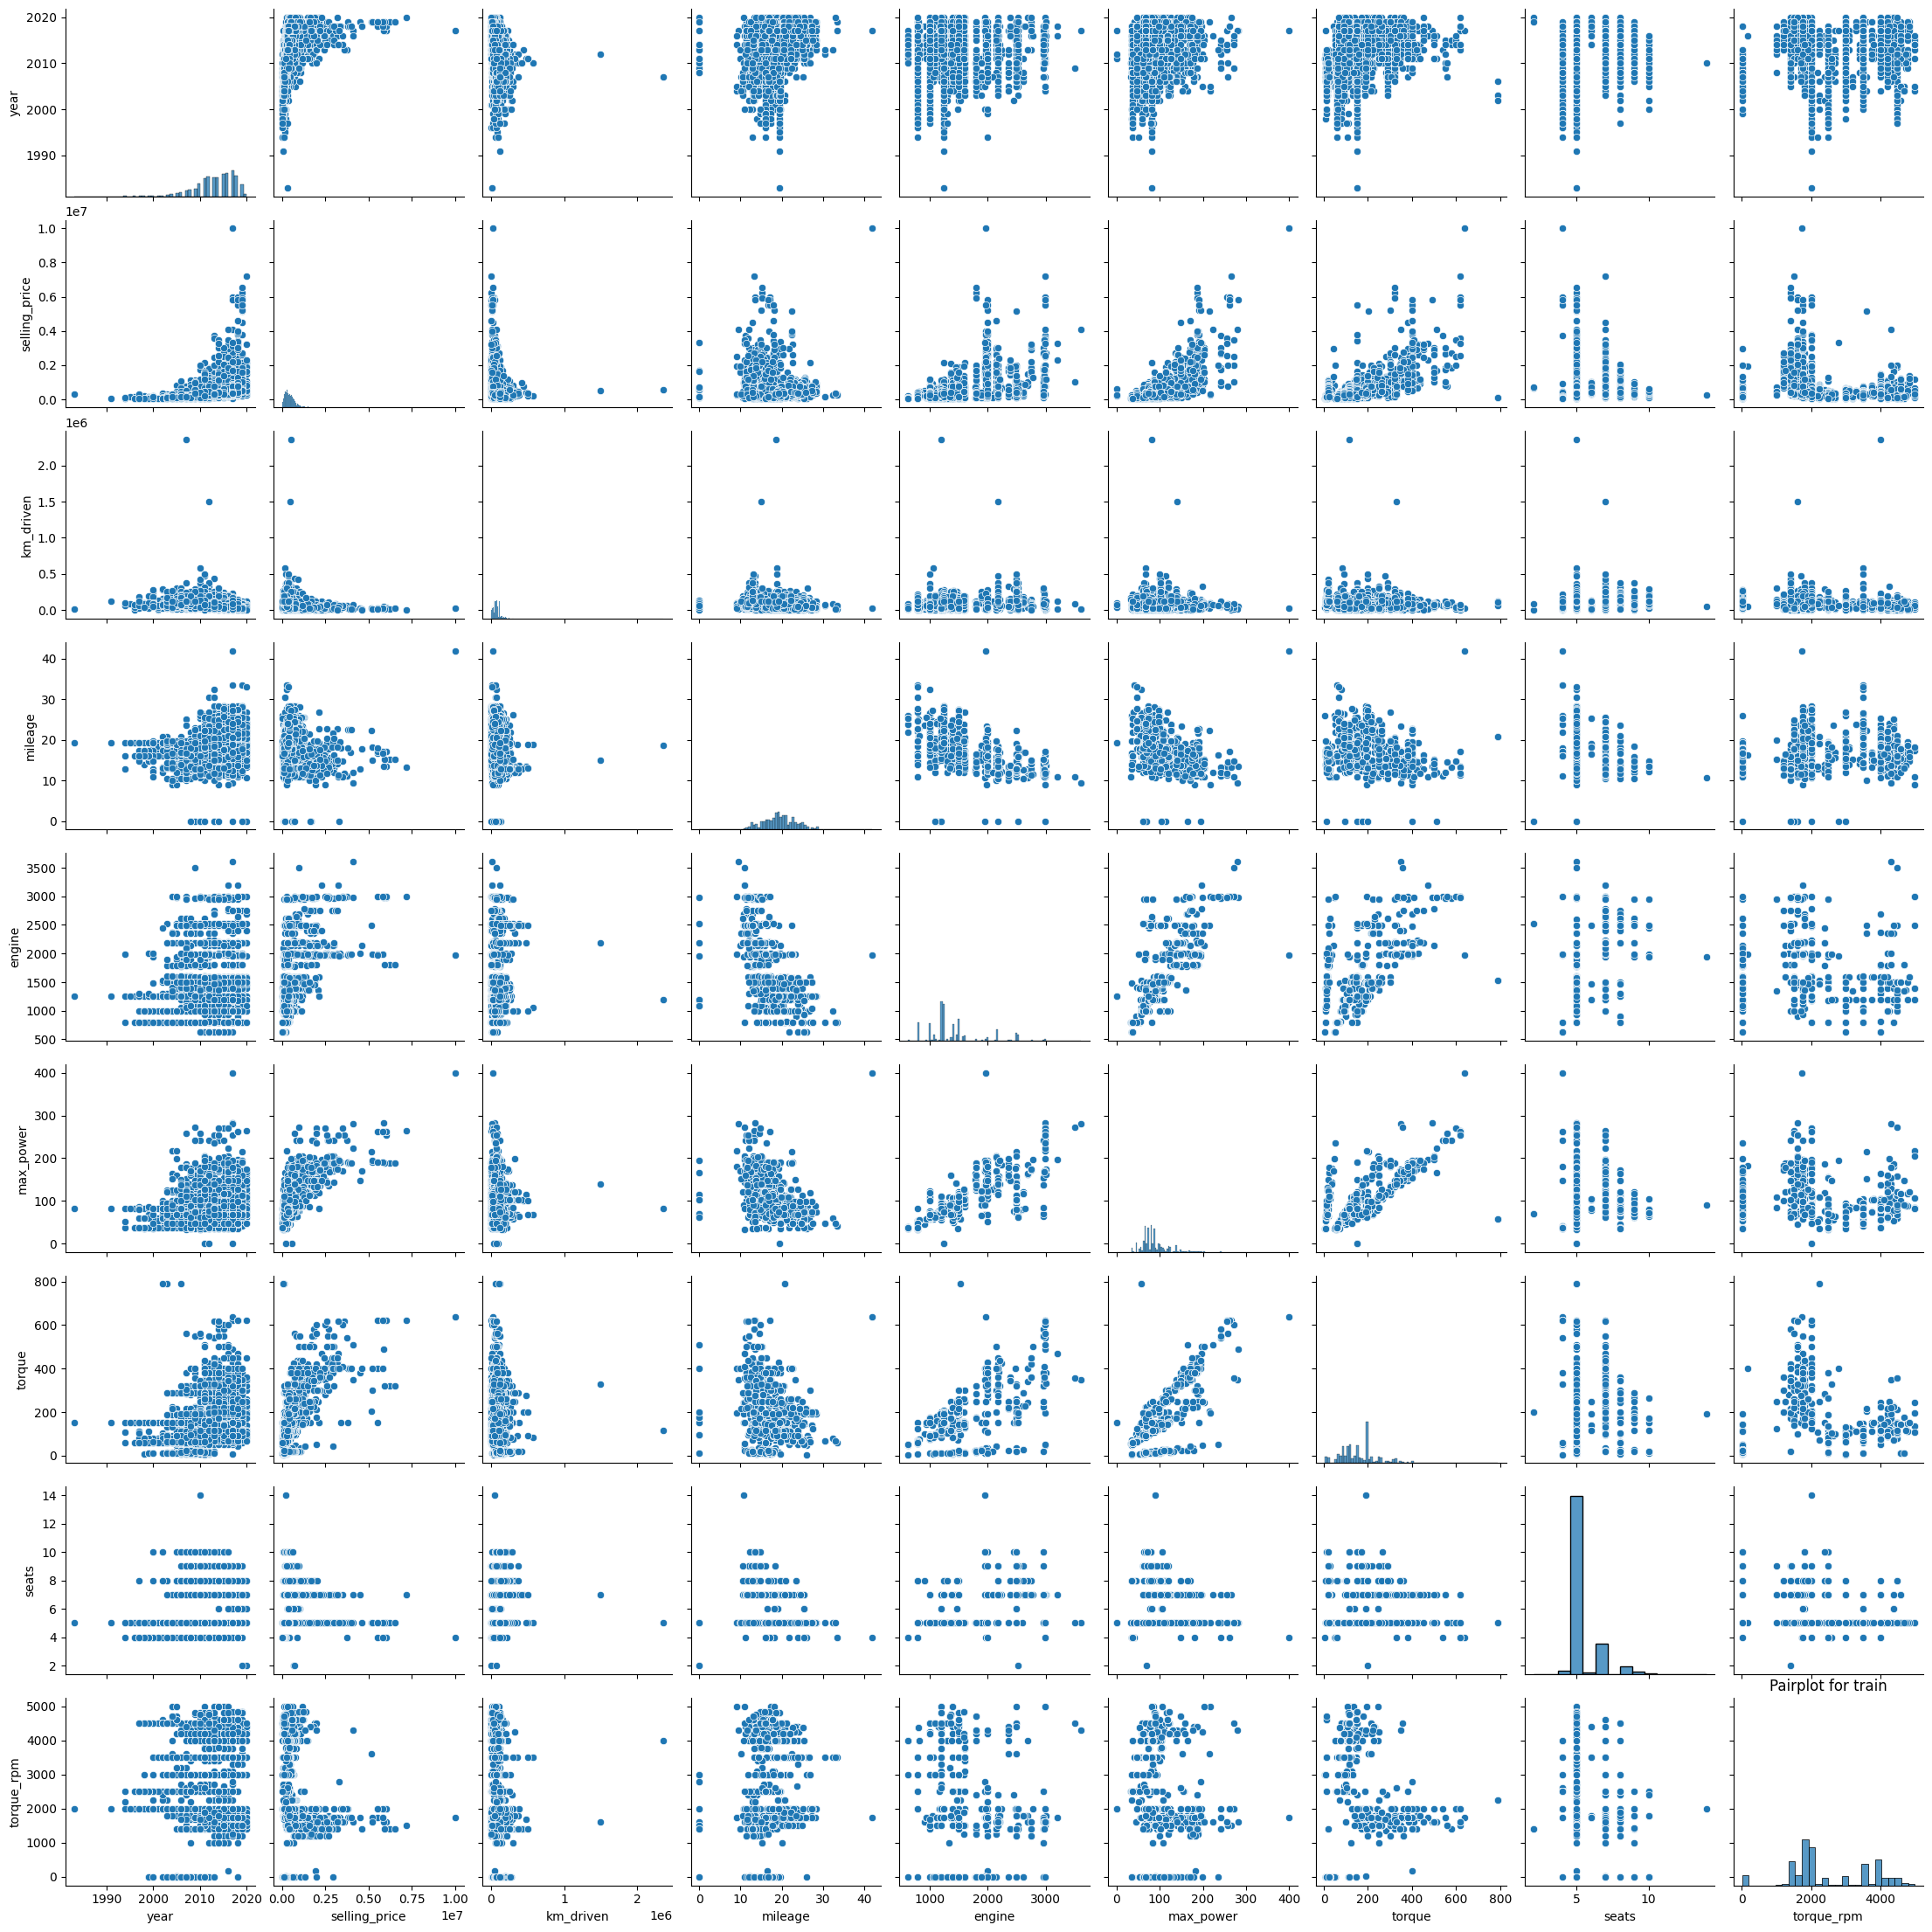

In [25]:
%matplotlib inline

num_cols = df_train.select_dtypes(include='number').columns
plt.figure(figsize=(12, 12))
sns.pairplot(df_train[num_cols])
plt.title("Pairplot for train")
plt.show()

<Figure size 1200x1200 with 0 Axes>

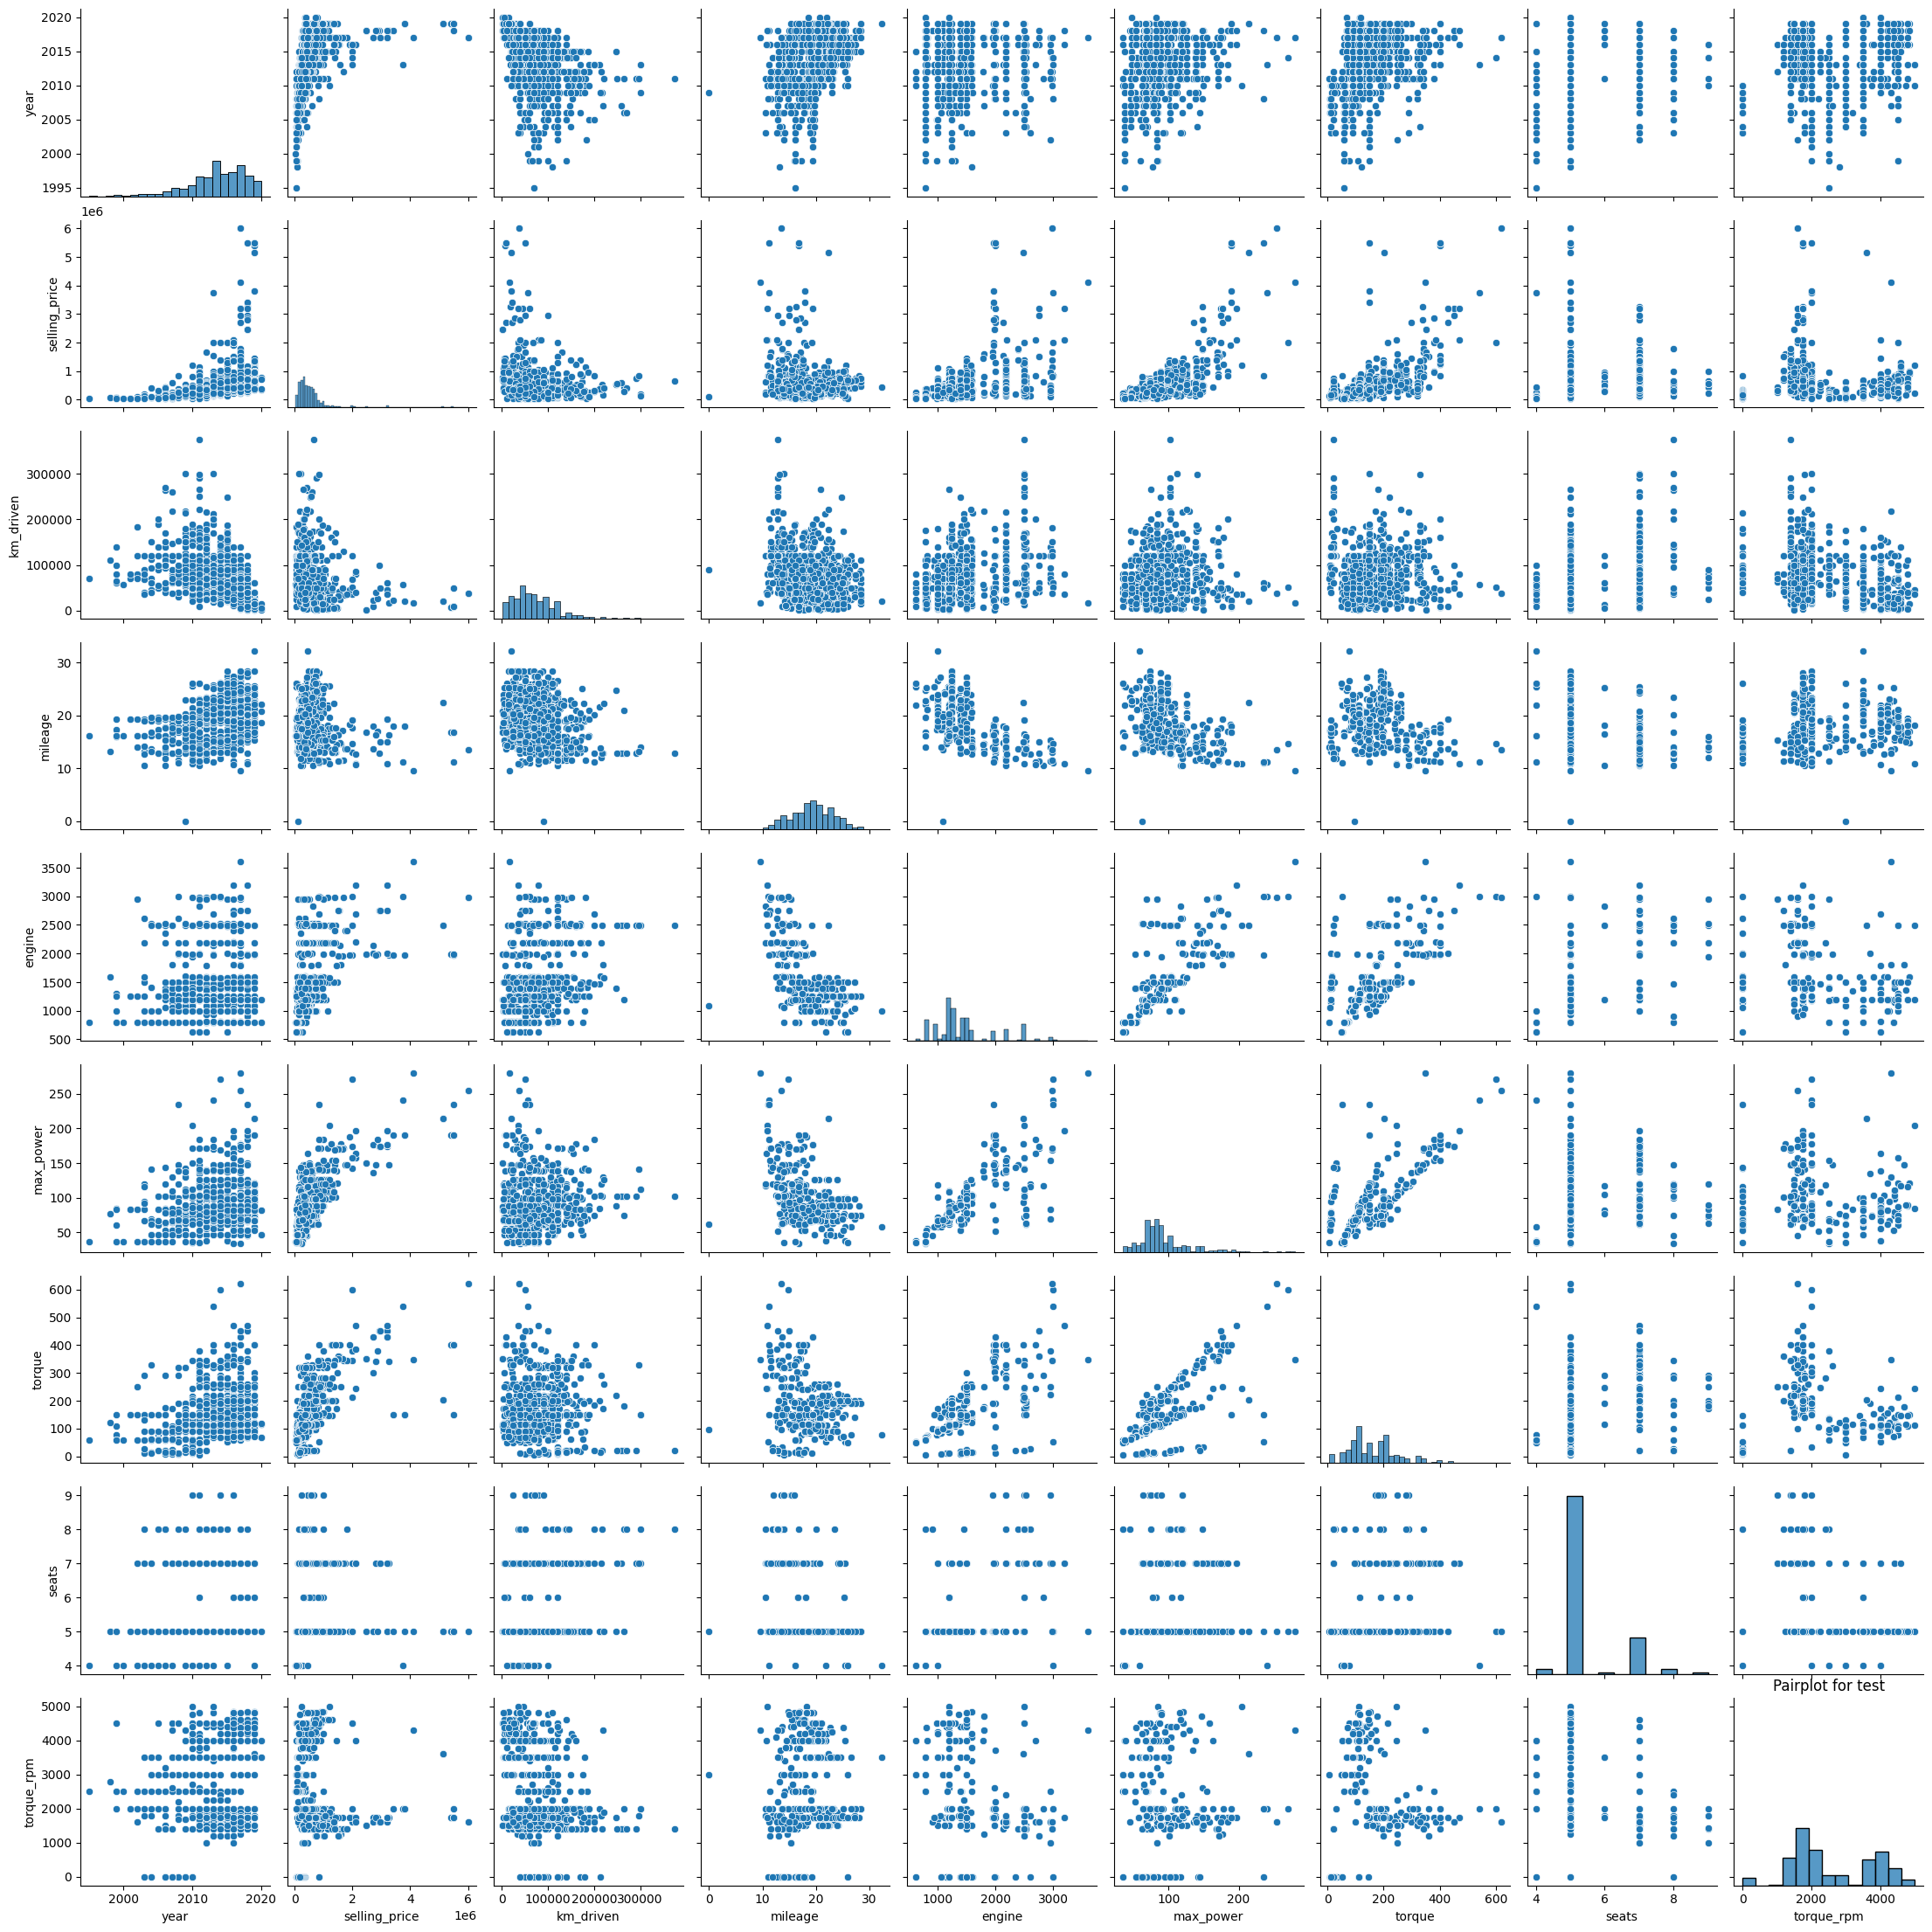

In [26]:
plt.figure(figsize=(12, 12))
sns.pairplot(df_test[num_cols])
plt.title("Pairplot for test")
plt.show()

Таргет имеет очевидную корреляцию с year, km_driven. Чем больше год, тем больше цена, чем больше пробег, тем цена ниже.
На некоторых признаках распределение на тесте и на трейне не совпадает. 

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [27]:
df_train[num_cols].corr(method='pearson')

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage        0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine         0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power      0.156858       0.692814   0.024588 -0.373390  0.681117   
torque         0.249623       0.611215   0.038679 -0.120056  0.601959   
seats          0.041178       0.149953   0.192328 -0.451059  0.652172   
torque_rpm     0.163710      -0.159707  -0.271120  0.091963 -0.453526   

               max_power    torque     seats  torque_rpm  
year            0.156858  0.249623  0.041178    0.163710  
selling_price   0.692814  0.611215  0.149953   -0.159707  
km_driven       0.024588  0.038679  0.192328   -0.271120  
mileage        -0.373390 -0.120056 -0.451059    0.091963  
engine          0.681117  0.601959  0.652172   -0.453526  
max_power       1.000000  0.753807  0.244112   -0.244654  
torque          0.753807  1.000000  0.294779   -0.356406  
seats           0.244112  0.294779  1.000000   -0.301520  
torque_rpm     -0.244654 -0.356406 -0.301520    1.000000

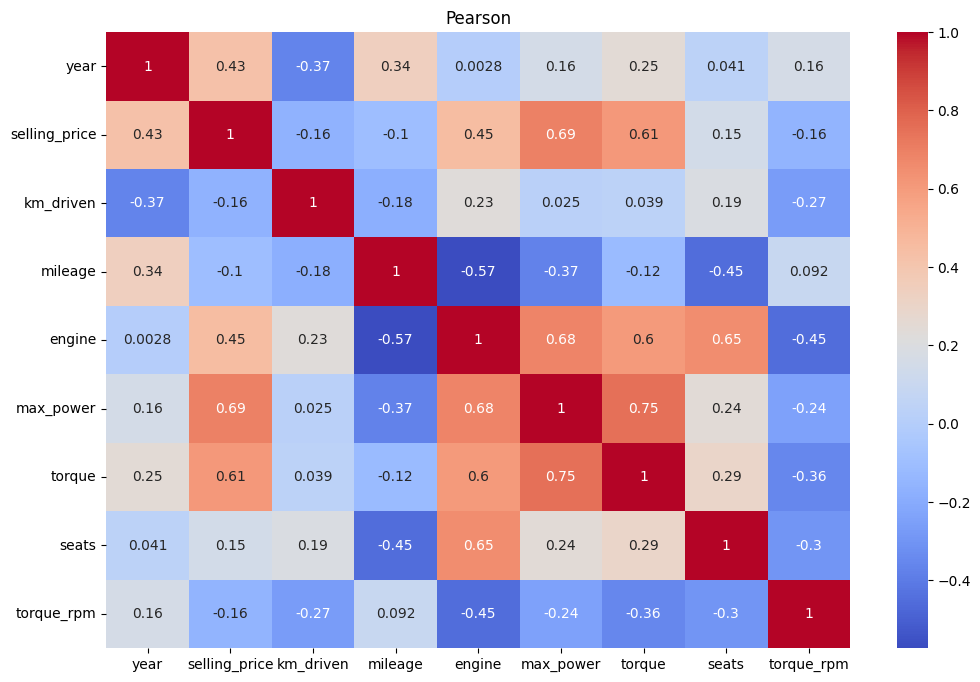

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train[num_cols].corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title("Pearson")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1. Engine-year
2. Torque-maxpower (0.75), maxpower-selling price (0.69), maxpower-engine (0.68)
3. Корреляция между годом и пробегом отрицательная и не очень сильная, но, в целом, можно сказать, что чем меньше год, тем больше пробег. 

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [29]:
def spearman_correlation_manual(x, y):
    n = len(x)
    diff = (np.argsort(np.argsort(x)) - np.argsort(np.argsort(y))) ** 2
    return 1 - (6 * np.sum(diff)) / (n * (n ** 2 - 1))

In [30]:
from sklearn.isotonic import spearmanr


x = df_train['year'].to_numpy()
y = df_train['km_driven'].to_numpy()

spearman_manual = spearman_correlation_manual(x, y)
spearman, _ = spearmanr(x, y)

spearman_manual, spearman

(np.float64(-0.5675154093838706), np.float64(-0.5696590682866404))

In [31]:
y = df_train['engine'].to_numpy()

spearman_manual = spearman_correlation_manual(x, y)
spearman, _ = spearmanr(x, y)

spearman_manual, spearman

(np.float64(-0.03889028746614498), np.float64(-0.038055533665343616))

c:\Users\Gulfik\Desktop\petprojects\hseContest\.venv\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


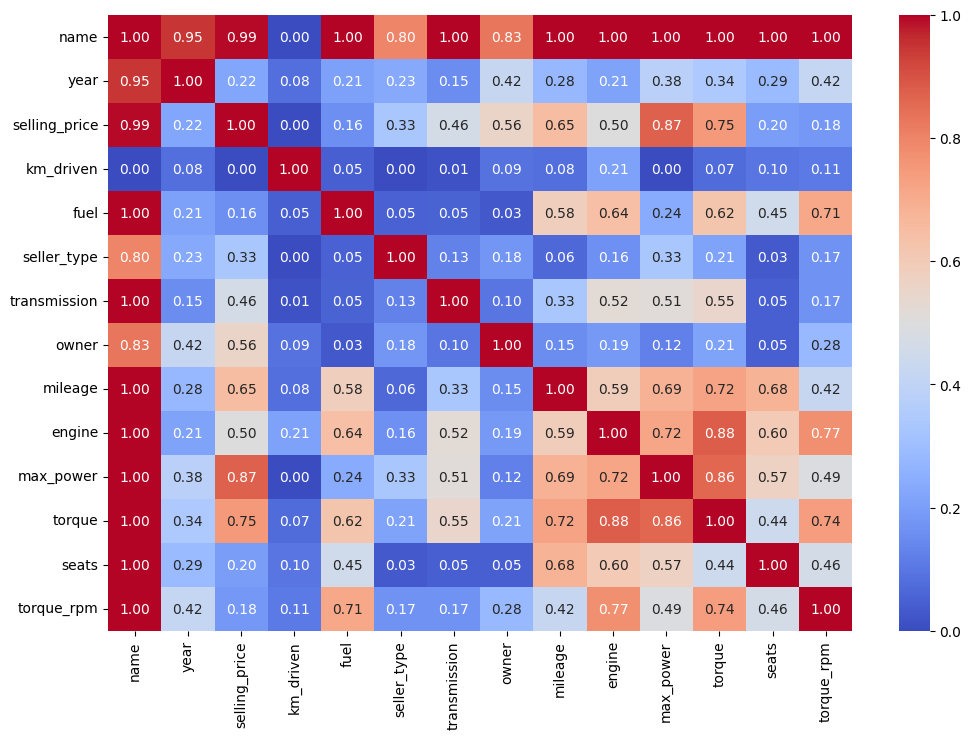

name      year  selling_price  km_driven      fuel  \
name           1.000000  0.948995       0.994871   0.000000  1.000000   
year           0.948995  1.000000       0.219841   0.081574  0.205834   
selling_price  0.994871  0.219841       1.000000   0.000000  0.157885   
km_driven      0.000000  0.081574       0.000000   1.000000  0.046285   
fuel           1.000000  0.205834       0.157885   0.046285  1.000000   
seller_type    0.799127  0.232412       0.334505   0.000000  0.050771   
transmission   1.000000  0.153714       0.463058   0.012824  0.053721   
owner          0.830098  0.418636       0.557641   0.087887  0.030943   
mileage        0.999690  0.279253       0.649768   0.081625  0.582304   
engine         1.000000  0.213156       0.503682   0.210747  0.644421   
max_power      0.997906  0.381639       0.872166   0.000000  0.236006   
torque         0.999940  0.343224       0.747717   0.073328  0.622900   
seats          0.999985  0.288178       0.196447   0.096223  0.450714   
torque_rpm     0.999932  0.415428       0.181150   0.108773  0.711172   

               seller_type  transmission     owner   mileage    engine  \
name              0.799127      1.000000  0.830098  0.999690  1.000000   
year              0.232412      0.153714  0.418636  0.279253  0.213156   
selling_price     0.334505      0.463058  0.557641  0.649768  0.503682   
km_driven         0.000000      0.012824  0.087887  0.081625  0.210747   
fuel              0.050771      0.053721  0.030943  0.582304  0.644421   
seller_type       1.000000      0.127968  0.176612  0.064736  0.160346   
transmission      0.127968      1.000000  0.096990  0.331889  0.520161   
owner             0.176612      0.096990  1.000000  0.152406  0.186011   
mileage           0.064736      0.331889  0.152406  1.000000  0.588155   
engine            0.160346      0.520161  0.186011  0.588155  1.000000   
max_power         0.331904      0.511877  0.121438  0.687235  0.720780   
torque            0.214731      0.548697  0.212562  0.723641  0.881894   
seats             0.032173      0.045734  0.046741  0.679979  0.603400   
torque_rpm        0.167455      0.170502  0.283451  0.420766  0.774473   

               max_power    torque     seats  torque_rpm  
name            0.997906  0.999940  0.999985    0.999932  
year            0.381639  0.343224  0.288178    0.415428  
selling_price   0.872166  0.747717  0.196447    0.181150  
km_driven       0.000000  0.073328  0.096223    0.108773  
fuel            0.236006  0.622900  0.450714    0.711172  
seller_type     0.331904  0.214731  0.032173    0.167455  
transmission    0.511877  0.548697  0.045734    0.170502  
owner           0.121438  0.212562  0.046741    0.283451  
mileage         0.687235  0.723641  0.679979    0.420766  
engine          0.720780  0.881894  0.603400    0.774473  
max_power       1.000000  0.861201  0.569587    0.491126  
torque          0.861201  1.000000  0.441801    0.739681  
seats           0.569587  0.441801  1.000000    0.464440  
torque_rpm      0.491126  0.739681  0.464440    1.000000

In [32]:
import phik
from phik import resources, report


phik_corr_matrix = df_train.phik_matrix(interval_cols=num_cols)

plt.figure(figsize=(12, 8))
sns.heatmap(phik_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

phik_corr_matrix

Phik корреляция показывает нелинейную зависимость меджду признаками, можно заменить слудющие зависимоти:
- Engine-maxpower (0.88) - корреляция стала выше, чем при корреляции Пирсона, соответственно, можно сделать вывод, что зависимость между этими признаками также имеет нелинейный характер
- Selling price-maxpower (0.87) и Torque-maxpower (0.86) - корреляции так же стали выше, чем при корреляции Пирсона
- Появилась средняя корреляция mileage и selling price (0.65), что логично
- Появилась средняя корреляция fuel и toque_rpm (0.71). В целом, тоже есть логика, машины на разных видах топлива имеют разные обороты.

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

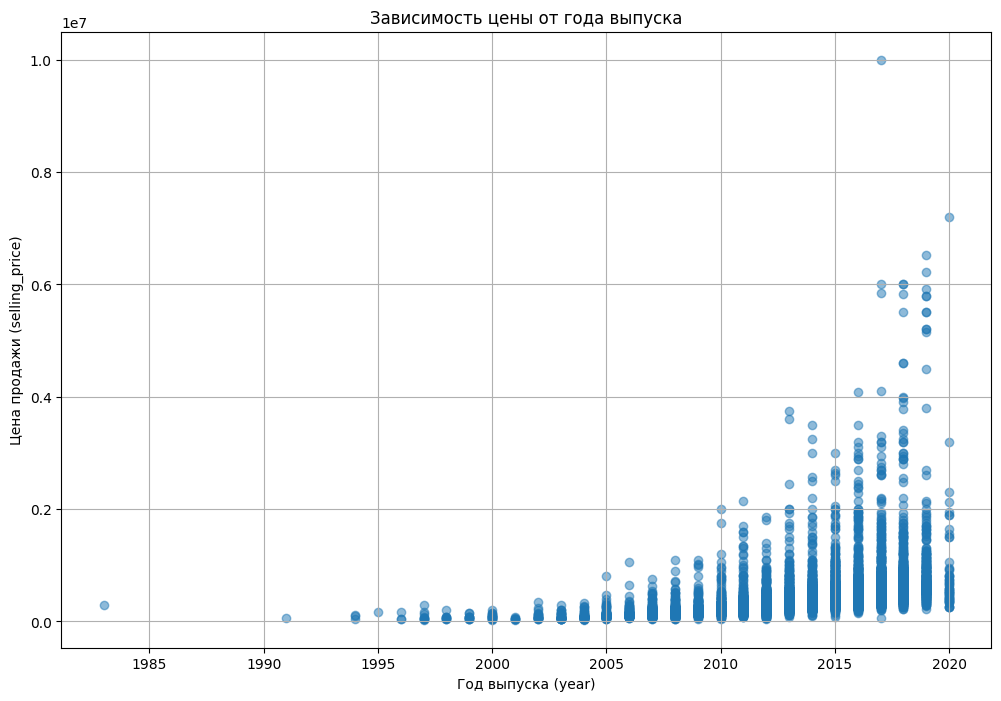

In [33]:
plt.figure(figsize=(12, 8))
plt.scatter(df_train['year'], df_train['selling_price'], alpha=0.5)
plt.title("Зависимость цены от года выпуска")
plt.xlabel("Год выпуска (year)")
plt.ylabel("Цена продажи (selling_price)")
plt.grid(True)
plt.show()

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [34]:
df_numeric = df_train[num_cols].copy()

In [35]:
from sklearn.model_selection import train_test_split


X = df_numeric.drop(columns=['selling_price'])
y = df_numeric['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape

(4672, 8)

In [ ]:
assert X_train.shape == (5840, 6) # Не понимаю что и где упустил, у меня получилось 8 столбцов

In [38]:
X_test.shape

(1168, 8)

In [ ]:
assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Train r2_score: {r2_score(y_train, y_train_pred)}")
print(f"Test r2_score: {r2_score(y_test, y_test_pred)}")

print(f"Train MSE: {MSE(y_train, y_train_pred)}")
print(f"Test MSE: {MSE(y_test, y_test_pred)}")

Train r2_score: 0.6072501024432199
Test r2_score: 0.5549243389139191
Train MSE: 105208225634.32593
Test MSE: 160946554323.81238


Как видно, качество модели не очень хорошее

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [40]:
def r2_manual(y_true, y_pred):
    y_mean = np.mean(y_true)
    rss = np.sum((y_true - y_pred) ** 2)
    tss = np.sum((y_true - y_mean) ** 2)
    r2 = 1 - (rss / tss)
    return r2

print(f"Train r2_manual: {r2_manual(y_train, y_train_pred)}")
print(f"Test r2_manual: {r2_manual(y_test, y_test_pred)}")

Train r2_manual: 0.6072501024432199
Test r2_manual: 0.5549243389139191


RSS - сумма квадратов остатков регрессии, разница между истинными и предсказанными значениями \
TSS - сумма квадратов отклонений истинных значений от их среднего, измеряющая общую вариацию данных.

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [41]:
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))


train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

n_train = X_train.shape[0]
k_train = X_train.shape[1]

n_test = X_test.shape[0]
k_test = X_test.shape[1]

print(f"Train adjusted_r2_train: {adjusted_r2(train_r2, n_train, k_train)}")
print(f"Test adjusted_r2_train: {adjusted_r2(test_r2, n_test, k_test)}")

Train adjusted_r2_train: 0.6065762874785074
Test adjusted_r2_train: 0.55185220320323


Если adjusted-𝑅2 значительно ниже обычного 𝑅2, значит, что модель содержит много "лишних" признаков. \
Если adjusted-𝑅2 близок к 𝑅2, значит, почти все предикторы вносят значимый вклад в данных.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [43]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

feature_importances.iloc[0]['Feature']

'seats'

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [44]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

print(f"Train Lasso r2_score: {r2_score(y_train, y_train_pred_lasso)}")
print(f"Test Lasso r2_score: {r2_score(y_test, y_test_pred_lasso)}")

print(f"Train Lasso MSE: {MSE(y_train, y_train_pred_lasso)}")
print(f"Test Lasso MSE: {MSE(y_test, y_test_pred_lasso)}")

Train Lasso r2_score: 0.607250102399187
Test Lasso r2_score: 0.5549259692634245
Train Lasso MSE: 105208225646.12129
Test Lasso MSE: 160945964763.07437


In [45]:
lasso_model.coef_ 

array([157150.33577041, -66443.64292113, -16440.16906976,  46624.58721357,
       246608.1009617 ,  65232.45267291, -38486.6065232 , -36982.15106345])

Лассо не занулила коэффициенты, возможно, все признаки явлются информативными

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [46]:
from sklearn.model_selection import GridSearchCV


param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
              'max_iter': [1000, 5000, 10000]}
lasso = Lasso()
grid_search = GridSearchCV(
    estimator=lasso, param_grid=param_grid, cv=10, scoring='r2')

grid_search.fit(X_train_scaled, y_train)

print(f"GS r2: {grid_search.best_score_:.4f}")

GS r2: 0.6080


In [47]:
grid_search = GridSearchCV(
    estimator=lasso, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print(f"GS mse: {-grid_search.best_score_:.4f}")

GS mse: 106009374049.2146


In [48]:
print(f"Лучший эстиматор: {grid_search.best_estimator_}")
print(f"Лучшие параметры: {grid_search.best_params_}")

Лучший эстиматор: Lasso(alpha=10)
Лучшие параметры: {'alpha': 10, 'max_iter': 1000}


In [49]:
grid_search.best_estimator_.coef_

array([157132.78108962, -66433.72328863, -16414.60434772,  46603.78193963,
       246627.1063645 ,  65224.02057732, -38451.82819661, -36966.57480575])

Обучилось 10 * 6 * 3 = 180 моделей \
Я использовал коэффициент регуляризации (на сколько сильно штрафуем модель) и максимальное кол-во итераций алгоритма в своём param_grid'e \
Лучший коэф-т - 100, никакие веса у меня не занулились

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [50]:
from sklearn.linear_model import ElasticNet

param_grid_elastic = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [1000, 5000, 10000]
}

elastic_net = ElasticNet()
grid_search_elastic = GridSearchCV(estimator=elastic_net, param_grid=param_grid_elastic, cv=10, scoring='r2')
grid_search_elastic.fit(X_train_scaled, y_train)

print(f"Elastic r2: {grid_search_elastic.best_score_:.4f}")

Elastic r2: 0.6081


In [51]:
grid_search_elastic = GridSearchCV(estimator=elastic_net, param_grid=param_grid_elastic, cv=10, scoring='neg_mean_squared_error')
grid_search_elastic.fit(X_train_scaled, y_train)

print(f"Elastic mse: {-grid_search_elastic.best_score_:.4f}")

Elastic mse: 106008609410.2715


In [52]:
print(f"Лучший эстиматор: {grid_search_elastic.best_estimator_}")
print(f"Лучшие параметры: {grid_search_elastic.best_params_}")

Лучший эстиматор: ElasticNet(alpha=0.01)
Лучшие параметры: {'alpha': 0.01, 'max_iter': 1000}


Обучилост 10 * 5 * 3 = 150 моделей \ 
Альфа = 0.01, max_iter = 1000

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
from sklearn.calibration import LabelEncoder


label_encoder = LabelEncoder()
df_train['name'] = label_encoder.fit_transform(df_train['name'])

In [54]:
df_train

name  year  selling_price  km_driven    fuel seller_type transmission  \
0     1227  2014         450000     145500  Diesel  Individual       Manual   
1     1508  2014         370000     120000  Diesel  Individual       Manual   
2      726  2010         225000     127000  Diesel  Individual       Manual   
3     1268  2007         130000     120000  Petrol  Individual       Manual   
4      644  2017         440000      45000  Petrol  Individual       Manual   
...    ...   ...            ...        ...     ...         ...          ...   
5835   559  2008         120000     191000  Petrol  Individual       Manual   
5836  1325  2013         260000      50000  Petrol  Individual       Manual   
5837   716  2013         320000     110000  Petrol  Individual       Manual   
5838   609  2007         135000     119000  Diesel  Individual       Manual   
5839  1239  2009         382000     120000  Diesel  Individual       Manual   

                     owner  mileage  engine  max_power  torque  seats  \
0              First Owner    23.40    1248      74.00  190.00      5   
1             Second Owner    21.14    1498     103.52  250.00      5   
2              First Owner    23.00    1396      90.00  150.00      5   
3              First Owner    16.10    1298      88.20   11.50      5   
4              First Owner    20.14    1197      81.86  113.75      5   
...                    ...      ...     ...        ...     ...    ...   
5835           First Owner    17.92    1086      62.10   96.10      5   
5836          Second Owner    18.90     998      67.10   90.00      5   
5837           First Owner    18.50    1197      82.85  113.70      5   
5838  Fourth & Above Owner    16.80    1493     110.00   24.00      5   
5839           First Owner    19.30    1248      73.90  190.00      5   

      torque_rpm  
0         2000.0  
1         1500.0  
2         2000.0  
3            4.0  
4         4000.0  
...          ...  
5835      3000.0  
5836      3500.0  
5837      4000.0  
5838         1.0  
5839      2000.0  

[5840 rows x 14 columns]

In [55]:
X = df_train.drop(columns=['selling_price'])
y = df_train['selling_price']

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
assert X_train_cat.shape == (5840, 11)

In [57]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     4672        4672         4672         4672
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      2525        4167         4266         2877

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [58]:
ohe_columns = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

In [59]:
from sklearn.preprocessing import OneHotEncoder


ohe = OneHotEncoder(sparse_output=False, drop='first')

X_train_cat_ohe = pd.DataFrame(ohe.fit_transform(X_train_cat[ohe_columns]),
                               columns=ohe.get_feature_names_out(ohe_columns))
X_test_cat_ohe = pd.DataFrame(ohe.transform(X_test_cat[ohe_columns]),
                              columns=ohe.get_feature_names_out(ohe_columns))

X_train_cat = X_train_cat.drop(columns=ohe_columns).reset_index(drop=True)
X_test_cat = X_test_cat.drop(columns=ohe_columns).reset_index(drop=True)

X_train_cat = pd.concat([X_train_cat, X_train_cat_ohe], axis=1)
X_test_cat = pd.concat([X_test_cat, X_test_cat_ohe], axis=1)

X_train_cat.head()

name  year  km_driven  mileage  engine  max_power  torque  torque_rpm  \
0   517  2014      80000    24.00    1120      70.00  160.00      1500.0   
1  1259  2011      85000    19.37    1248      81.86  150.00      2000.0   
2  1257  2012      50000    22.90    1248      74.00  190.00      2000.0   
3   226  2015      80000    25.01    1498      89.75  204.00      2000.0   
4   508  2018       4000    18.90    1197      81.86  113.75      4000.0   

   fuel_Diesel  fuel_LPG  ...  owner_Test Drive Car  owner_Third Owner  \
0          1.0       0.0  ...                   0.0                0.0   
1          1.0       0.0  ...                   0.0                0.0   
2          1.0       0.0  ...                   0.0                0.0   
3          1.0       0.0  ...                   0.0                0.0   
4          0.0       0.0  ...                   0.0                0.0   

   seats_4  seats_5  seats_6  seats_7  seats_8  seats_9  seats_10  seats_14  
0      0.0      1.0      0.0      0.0      0.0      0.0       0.0       0.0  
1      0.0      1.0      0.0      0.0      0.0      0.0       0.0       0.0  
2      0.0      1.0      0.0      0.0      0.0      0.0       0.0       0.0  
3      0.0      1.0      0.0      0.0      0.0      0.0       0.0       0.0  
4      0.0      1.0      0.0      0.0      0.0      0.0       0.0       0.0  

[5 rows x 26 columns]

In [69]:
X_train_cat.columns

Index(['name', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'torque_rpm', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner',
       'seats_4', 'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9',
       'seats_10', 'seats_14', 'hp_per_liter', 'year_squared'],
      dtype='object')

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

1. Удаляем один столбец, тренируем и применяем на трейне, только применяем на тесте, можем удалить какие-то неважные признаки.
2. Чтобы избежать линейной зависимости между закодированными столбцами.
3. Да, корректно, удалим лишние признаки - улучшим обобщающую способность модели.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
              'max_iter': [1000, 5000, 10000]}
ridge = Ridge()
grid_search = GridSearchCV(
    estimator=ridge, param_grid=param_grid, cv=10, scoring='r2')

grid_search.fit(X_train_cat, y_train_cat)

print(f"GS r2: {grid_search.best_score_:.4f}")

c:\Users\Gulfik\Desktop\petprojects\hseContest\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.64643e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Gulfik\Desktop\petprojects\hseContest\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.64643e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Gulfik\Desktop\petprojects\hseContest\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.64643e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GS r2: 0.6878


In [61]:
grid_search = GridSearchCV(
    estimator=ridge, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_cat, y_train_cat)

print(f"GS mse: {-grid_search.best_score_:.4f}")

c:\Users\Gulfik\Desktop\petprojects\hseContest\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.64643e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Gulfik\Desktop\petprojects\hseContest\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.64643e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Gulfik\Desktop\petprojects\hseContest\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.64643e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GS mse: 83306319467.5661


Качество стало чуть получше

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [62]:
X_train_cat['hp_per_liter'] = X_train_cat['max_power'] / X_train_cat['engine']
X_test_cat['hp_per_liter'] = X_test_cat['max_power'] / X_test_cat['engine']

X_train_cat['year_squared'] = X_train_cat['year'] ** 2
X_test_cat['year_squared'] = X_test_cat['year'] ** 2

X_train_cat['max_power'] = X_train_cat['max_power'].clip(upper=X_train_cat['max_power'].quantile(0.95))
X_test_cat['max_power'] = X_test_cat['max_power'].clip(upper=X_test_cat['max_power'].quantile(0.95))

In [63]:
X_train_cat.drop(columns=['year'])
X_test_cat.drop(columns=['year'])

name  km_driven  mileage  engine  max_power  torque  torque_rpm  \
0      974      77088    14.00    2489      95.00   150.0      2000.0   
1     1311      50000    26.60     998      58.16    77.0      3500.0   
2      832      15000    18.15    1198      82.00   115.0      3500.0   
3      199      30000    21.70    1498      98.96   215.0      1750.0   
4     1170     100000    21.10    1248      73.90   113.0      4500.0   
...    ...        ...      ...     ...        ...     ...         ...   
1163   553      40000     0.00    1086      62.00    96.1      3000.0   
1164   810      30000    19.37    1248      81.86   150.0      2000.0   
1165  1234     100000    17.50    1298      85.80   114.0      4000.0   
1166  1911     130000    20.54    1598     103.60   250.0      1500.0   
1167   630      70000    24.40    1120      71.00   180.4      1750.0   

      fuel_Diesel  fuel_LPG  fuel_Petrol  ...  seats_4  seats_5  seats_6  \
0             1.0       0.0          0.0  ...      0.0      0.0      0.0   
1             0.0       0.0          0.0  ...      0.0      1.0      0.0   
2             0.0       0.0          1.0  ...      0.0      0.0      1.0   
3             1.0       0.0          0.0  ...      0.0      1.0      0.0   
4             1.0       0.0          0.0  ...      0.0      1.0      0.0   
...           ...       ...          ...  ...      ...      ...      ...   
1163          0.0       0.0          1.0  ...      0.0      1.0      0.0   
1164          1.0       0.0          0.0  ...      0.0      1.0      0.0   
1165          0.0       0.0          1.0  ...      0.0      1.0      0.0   
1166          1.0       0.0          0.0  ...      0.0      1.0      0.0   
1167          1.0       0.0          0.0  ...      0.0      1.0      0.0   

      seats_7  seats_8  seats_9  seats_10  seats_14  hp_per_liter  \
0         0.0      1.0      0.0       0.0       0.0      0.038168   
1         0.0      0.0      0.0       0.0       0.0      0.058277   
2         0.0      0.0      0.0       0.0       0.0      0.068447   
3         0.0      0.0      0.0       0.0       0.0      0.066061   
4         0.0      0.0      0.0       0.0       0.0      0.059215   
...       ...      ...      ...       ...       ...           ...   
1163      0.0      0.0      0.0       0.0       0.0      0.057090   
1164      0.0      0.0      0.0       0.0       0.0      0.065593   
1165      0.0      0.0      0.0       0.0       0.0      0.066102   
1166      0.0      0.0      0.0       0.0       0.0      0.064831   
1167      0.0      0.0      0.0       0.0       0.0      0.063393   

      year_squared  
0          4040100  
1          4064256  
2          4064256  
3          4064256  
4          4040100  
...            ...  
1163       4044121  
1164       4020025  
1165       4032064  
1166       4048144  
1167       4060225  

[1168 rows x 27 columns]

In [64]:
X_train_scaled = scaler.fit_transform(X_train_cat)
X_test_scaled = scaler.transform(X_test_cat)

In [65]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
              'max_iter': [1000, 5000, 10000]}

ridge = Ridge()
grid_search = GridSearchCV(
    estimator=ridge, param_grid=param_grid, cv=10, scoring='r2'
)
grid_search.fit(X_train_cat, y_train_cat)

best_params = grid_search.best_params_

best_ridge_model = Ridge(
    alpha=best_params['alpha'], max_iter=best_params['max_iter'])
best_ridge_model.fit(X_train_cat, y_train_cat)

train_r2 = best_ridge_model.score(X_train_cat, y_train_cat)
test_r2 = best_ridge_model.score(X_test_cat, y_test_cat)

print(f"Train r2: {train_r2:.4f}")
print(f"Test r2: {test_r2:.4f}")

c:\Users\Gulfik\Desktop\petprojects\hseContest\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.42942e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Gulfik\Desktop\petprojects\hseContest\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.42942e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Gulfik\Desktop\petprojects\hseContest\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.42942e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train r2: 0.7166
Test r2: 0.6494


In [82]:
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cat)
X_test_scaled = scaler.transform(X_test_cat)

joblib.dump(scaler, "scaler.pkl")
joblib.dump(best_ridge_model, "ridge_model.pkl")
joblib.dump(ohe, "onehotencoder.pkl")

label_encoder = LabelEncoder()
names_with_unknown = list(df_train['name'].unique()) + ["unknown"]
label_encoder.fit(names_with_unknown)
joblib.dump(label_encoder, "label_encoder.pkl")

feature_names = X_train_cat.columns.tolist()
with open("feature_names.pkl", "wb") as f:
    joblib.dump(feature_names, f)

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metrics(y_true, y_pred):
    # your code here

business_metrics(# your code here)

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [ ]:
def your_business_metrics(y_true, y_pred):

business_metrics(# your code here)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>